In [49]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
#mypath = r'C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\Renzo Results\renzo_trials'
#mypath = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\min_cost_T1"
#mypath = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\run_5_before_class"
#mypath = r'C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\min_runtime_T1'
#mypath = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\test_run"
mypath = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\Trails for Fs"
f = []
for (dirpath, dirnames, filenames) in os.walk(mypath):
    filenames
    break


In [55]:
number_of_configurations = len(dirnames)
number_instances_per_config = len(os.listdir(mypath + '/' + dirnames[0])) - 1


In [56]:
number_of_configurations, number_instances_per_config


(14, 40)

In [57]:
print("Folders")
dir_name_list = []
count = 0
for i, dirname in enumerate(dirnames):
    count += 1
    dir_name_list.append(dirname)
    print(i, ' ', dirname)

Folders
0   BACK_TO_OLD_1_22_12_17_01_53_D
1   BACK_TO_OLD_1_22_12_17_04_52
2   BACK_TO_OLD_1_22_12_17_11_29
3   BACK_TO_OLD_1_22_12_17_15_42
4   BACK_TO_OLD_1_22_12_17_19_25
5   BACK_TO_OLD_1_22_12_18_00_51
6   BACK_TO_OLD_1_22_12_18_08_33
7   BACK_TO_OLD_1_22_12_18_11_19
8   BACK_TO_OLD_1_22_12_18_14_51
9   BACK_TO_OLD_1_22_12_18_20_26
10   new_OLD__22_12_19_00_04
11   new_OLD__22_12_19_02_54
12   new_OLD__22_12_19_09_34
13   new_OLD__22_12_19_13_28


# Helper Functions

In [58]:
config_num = 0
instance_num = 0


def text_to_float(text):
    return float(text.split('= ')[-1].split(' \n')[0])

def text_to_str(text):
    return str(text.split('= ')[-1].split(' \n')[0])

def retrieve_instance_result(config_num, instance_num):
    """
    returns runtime and objective for a given configuration and instance number
    """
    path = mypath + '/' + dirnames[config_num]
    instance_filename = f'instance_{instance_num}.txt'

    if instance_filename in os.listdir(path):
        with open(path + '/' + instance_filename) as f:
            contents = f.readlines()

    rt = text_to_float(contents[-3])
    obj = text_to_float(contents[-2])
    status = text_to_str(contents[-1])

    return rt, obj, status


In [59]:
instance_num_list = []
number_instances_per_config = (os.listdir(mypath + '/' + dirnames[0]))
for name in number_instances_per_config:
    if name[0] == 'i':
        instance_num_list.append(name)
len(instance_num_list)

20

In [60]:
def get_metric_over_all_instances(config_num, metric):
    """
    Gets the runtime or obj for a given configuration number
    """
    number_of_configurations = len(dirnames)
    find_inst = os.listdir(mypath + '/' + dirnames[config_num])

    instance_num_list = []

    for name in find_inst:
        if name[0] == 'i':
            instance_num_list.append(name)

    metric_vals = []

    for instance_num in range(len(instance_num_list)):
        rt, obj = retrieve_instance_result(config_num, instance_num)

        if metric == 'runtime':
            metric_vals.append(rt)

        elif metric == 'obj':
            metric_vals.append(obj)

    return metric_vals


In [61]:
find_inst = os.listdir(mypath + '/' + dirnames[0])

instance_num_list = []

for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name)
instance_num_list


['instance_0.txt',
 'instance_1.txt',
 'instance_10.txt',
 'instance_11.txt',
 'instance_12.txt',
 'instance_13.txt',
 'instance_14.txt',
 'instance_15.txt',
 'instance_16.txt',
 'instance_17.txt',
 'instance_18.txt',
 'instance_19.txt',
 'instance_2.txt',
 'instance_3.txt',
 'instance_4.txt',
 'instance_5.txt',
 'instance_6.txt',
 'instance_7.txt',
 'instance_8.txt',
 'instance_9.txt']

# Extraction of CPLEX Results

In [63]:
#plot names
obj_list = []
runtime_list = []
folder_instance = []
instance_num_list = []
retrieve_instance_result_list = []
status_list = []
i_list = []
j_list = []

find_inst = os.listdir(mypath + '/' + dirnames[0])
for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name[:-4])
        
#folder_instance = [instance_num_list] * count
for i in range(0, count):
    folder_instance.append(instance_num_list)    
    runtime = []
    label_list = []
    obj = []
    status_l = []
    
    rt_l = []
    obj_l = []
    st_l = []
    
    i_list.append(i)
    for j in range(len(instance_num_list)):
        j_list.append(j)
        batch = retrieve_instance_result(i, j)
        retrieve_instance_result_list.append(batch)
        runtime.append(batch[0])
        obj.append(batch[1])
        status_l.append(batch[2])
        
    runtime_list.append(runtime[:len(instance_num_list)])
    obj_list.append(obj[:len(instance_num_list)])
    status_list.append(status_l[:len(instance_num_list)])

# Overview of Average Runtimes

([<matplotlib.axis.XTick at 0x1e10879a850>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

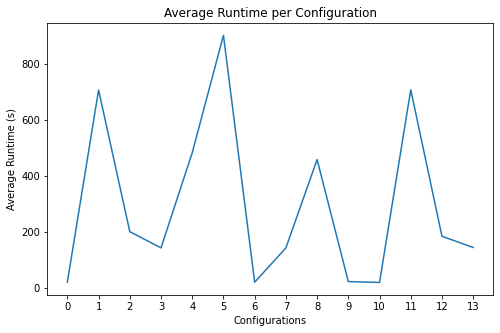

In [73]:
avg_runtime = []
avg_runtime_len = []
i=0
for run in runtime_list:
    avg_runtime.append(np.mean(run))
    avg_runtime_len.append(i)
    i += 1


plt.figure(figsize=(8,5))
plt.plot(avg_runtime)
plt.title("Average Runtime per Configuration")
plt.xlabel("Configurations")
plt.ylabel("Average Runtime (s)")
plt.xticks(avg_runtime_len)
#plt.yscale('log')

In [74]:
avg_runtime_pd = pd.DataFrame({"Configuration": avg_runtime_len, "Average Runtime": avg_runtime})

avg_runtime_pd

,Configuration,Average Runtime
0,0,19.762087
1,1,707.865211
2,2,200.525444
3,3,142.475767
4,4,483.429856
5,5,903.628731
6,6,19.691374
7,7,142.390553
8,8,458.837930
9,9,21.862391


# Runtime Vs. Instances Bar Plots

In [64]:
instance_num = len(instance_num_list)

In [67]:
import matplotlib.colors as mcolors


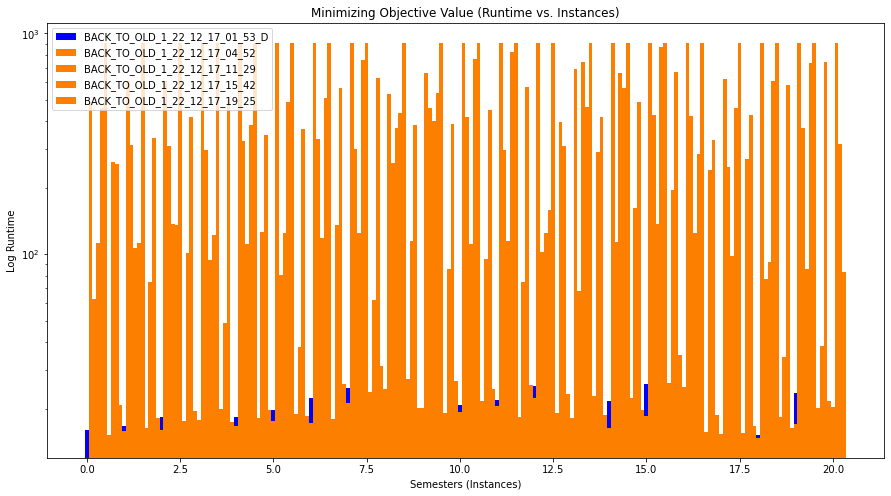

In [68]:
plt.figure(figsize=(15, 8))
X = np.arange(instance_num)
loc = 0
colors = plt.cm.Wistia(np.linspace(0, 256, len(runtime_list)))
w = 0.1

for j, config_results in enumerate(runtime_list):
    if j == 0:
        plt.bar(X + loc, config_results, width=w, color="blue")
    else:
        plt.bar(X + loc, config_results, width=w, color=colors[j])
    loc += 0.1
# plt.bar(X + 0.1, runtime_list[1], width=w, color="palegoldenrod")
# plt.bar(X + 0.2, runtime_list[2], width = w, color = "darkkhaki")
# plt.bar(X + 0.3, runtime_list[3], width=w, color="goldenrod")
# plt.bar(X + 0.4, runtime_list[4], width=w, color="darkgoldenrod")
plt.title(f'Minimizing Objective Value (Runtime vs. Instances)')
plt.ylabel("Log Runtime")
plt.xlabel("Semesters (Instances)")
plt.legend([dir_name_list[0], dir_name_list[1], dir_name_list[2], dir_name_list[3], dir_name_list[4]])
plt.yscale('log')
#plt.ylim(0,10**2.7)

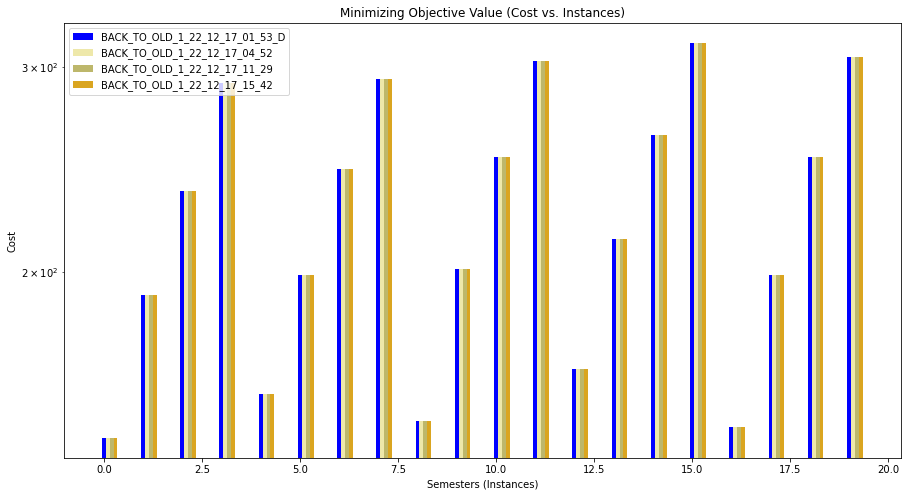

In [69]:
plt.figure(figsize=(15, 8))
X = np.arange(instance_num)
plt.bar(X, obj_list[0], label=i, width=0.1, color="blue")
plt.bar(X + 0.1, obj_list[1], width=0.1, color="palegoldenrod")
plt.bar(X + 0.2, obj_list[2], width=0.1, color="darkkhaki")
plt.bar(X + 0.3, obj_list[3], width=0.1, color="goldenrod")
# plt.bar(X + 0.4, obj_list[4], width=0.1, color="darkgoldenrod")
plt.title(f'Minimizing Objective Value (Cost vs. Instances)')
plt.ylabel("Cost")
plt.xlabel("Semesters (Instances)")
plt.legend([dir_name_list[0], dir_name_list[1],
           dir_name_list[2], dir_name_list[3]])#, dir_name_list[4]])
plt.yscale('log')
#plt.ylim(0,350)


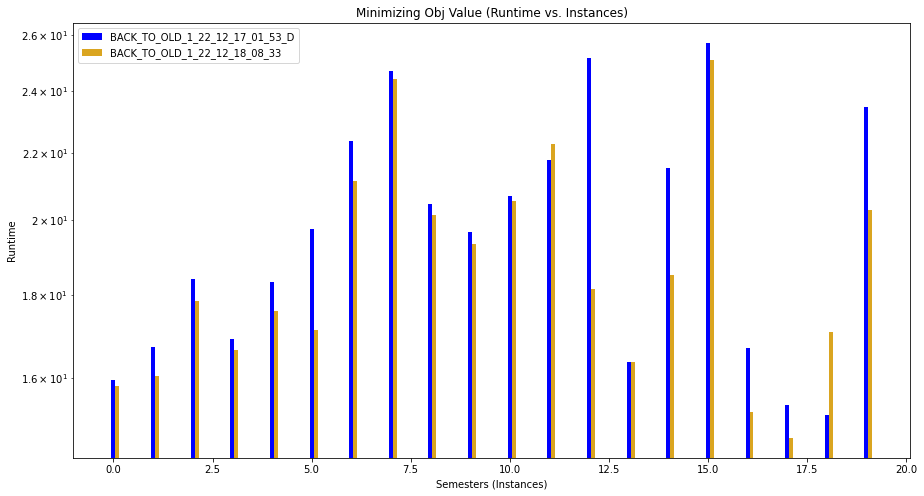

In [70]:
plt.figure(figsize=(15, 8))
X = np.arange(instance_num)
plt.bar(X, runtime_list[0], label=i, width=0.1, color="blue")
plt.bar(X + 0.1, runtime_list[10], width=0.1, color="goldenrod")
plt.title(f'Minimizing Obj Value (Runtime vs. Instances)')
plt.ylabel("Runtime")
plt.xlabel("Semesters (Instances)")
plt.legend([dir_name_list[0], dir_name_list[6]])
plt.yscale('log')
#plt.ylim(0,10**3)


# Schedule Display

In [97]:
file = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\Trails for Fs\BACK_TO_OLD_1_22_12_17_01_53_D\DF_Schedual_0.csv"
df_schedule = pd.read_csv(file)
df_schedule = df_schedule.drop(["Unnamed: 0"],axis=1)
display(df_schedule)

,timeslot,EXAM,TIMESLOT,ROOM,Room Size,Class Size,Student ID
0,0,JRE420H1F,2022-04-11 : 09:00:00,EX 300,108,107,"['0x7FBE50D89BBE601EB74B1F58E01E4AECEAF5191B',..."
1,0,ECE355H1F,2022-04-11 : 09:00:00,EX 310,106,34,"['0x4CCC65F8299A6D503F0176D50A9C800FFC4483CB',..."
2,1,CME321H1F,2022-04-11 : 14:00:00,ST VLAD,120,54,"['0x3955D8A492ECC6F1075FC09848D41F88262E3ED2',..."
3,2,AER525H1F,2022-04-11 : 19:00:00,MY 150,235,21,"['0x228C40399960A0AC27A791307CFAAF48F3FE2CCE',..."
4,2,CIV280H1F,2022-04-11 : 19:00:00,MS 2158,143,45,"['0x8B96CDE54CA9F579610A5C865D6A9C054D1A11E3',..."
...,...,...,...,...,...,...,...
149,63,AER506H1F,2022-04-30 : 14:00:00,RW 110,43,11,"['0x23D76CBC1F72D580991E6F502A59BFEF3B34715B',..."
150,63,CME499Y1Y,2022-04-30 : 14:00:00,BA 2185,50,5,"['0x7EA92EF7D0B0761D993D0435BB4146A45286DD07',..."
151,63,JRE410H1F,2022-04-30 : 14:00:00,EX 310,106,88,"['0x0E052C0B64135097814FBA52E27CBEF80F9A7C0B',..."
152,63,BME440H1F,2022-04-30 : 14:00:00,RW 110,43,9,"['0x26BE899A8C4A70E85ABBDD1B70EEC2C04A64B875',..."


In [98]:
file = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\Trails for Fs\BACK_TO_OLD_1_22_12_17_01_53_D\DF_Schedual_6.csv"
df_schedule = pd.read_csv(file)
df_schedule = df_schedule.drop(["Unnamed: 0"], axis=1)
display(df_schedule)


,timeslot,EXAM,TIMESLOT,ROOM,Room Size,Class Size,Student ID
0,0,APS343H1S,2022-04-11 : 09:00:00,EX 200,335,68,"['0x21647CA7A914C238F8EE5D7212A1F228AD8B4783',..."
1,1,ESC499Y1Y,2022-04-11 : 14:00:00,EX 100,309,180,"['0x0BD9618FD913CD6111C2F230945FC09E88229851',..."
2,1,MIE334H1S,2022-04-11 : 14:00:00,BN 2S,384,148,"['0x82C66990D69DB6E98806049C6BFAD54B30F63ACE',..."
3,2,AER302H1S,2022-04-11 : 19:00:00,WY 119,80,8,"['0x3D237DA20FEBA17C62DA39C6971A3D296C524E62',..."
4,2,CIV440H1S,2022-04-11 : 19:00:00,EX 100,309,101,"['0x9A509C9B190D68B8E8063ED2D2E4857EEE52660A',..."
...,...,...,...,...,...,...,...
177,62,MIE433H1S,2022-04-30 : 09:30:00,ST VLAD,120,3,"['0x4ABFF625FEB3230790907428319EDE65F201FF49',..."
178,62,ECE316H1S,2022-04-30 : 09:30:00,BN 2S,384,49,"['0x8E0808FBFB03583180BDF48A88479A6F41C4F9A2',..."
179,63,APS490Y1Y,2022-04-30 : 14:00:00,ES 1050,109,85,"['0x3836CCE78DFCC92B18C11D48202A1B2D4875479D',..."
180,63,ECE464H1S,2022-04-30 : 14:00:00,WB 116,82,2,"['0x8B96CDE54CA9F579610A5C865D6A9C054D1A11E3',..."


In [99]:
file = "Exam Sched Prog Datasets.xlsx"
file = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\Exam Sched Prog Datasets.xlsx"

rooms = pd.read_excel(file, sheet_name="datasets room caps ")
# courses_20221 = pd.read_excel(file, sheet_name = "20221 course size")
# enrolments_20221 = pd.read_excel(file, sheet_name = "20221 anonymized enrolments")
# schedule_20221 = pd.read_excel(file, sheet_name="20221 Final Schedule_fromLSM")
hist_anonymized_enrolments = pd.read_excel(file, sheet_name="hist anonymized enrolments")


In [100]:
hist_anonymized_enrolments


,HASHED_PERSON_ID,ACAD_ACT_CD,SESSION_CD,ADMINFACULTYCODE,ADMINDEPT,SECTION_CD
0,0x1DF5881E729F12C9D0CFCE696BD092E4B3E9CFDD,AER201H1,20191,APSC,ESC,S
1,0xB765DA4DC0EC088A3251A87FBE5C8C57B590A522,AER201H1,20191,APSC,ESC,S
2,0x6E36D66AB737A33314162AC13F5D6EB7C3B8075B,AER201H1,20191,APSC,ESC,S
3,0xEC381E2D439F49FC55D8A03DA0B40800CDAA6FD3,AER201H1,20191,APSC,ESC,S
4,0x5A61A6E005E8F0ACF9669BDDF73FB78657447FFE,AER201H1,20191,APSC,ESC,S
...,...,...,...,...,...,...
212953,0x378DC6855CFC4529FF881C318313F8D1D79153E7,TEP448H1,20231,APSC,ISTEP,S
212954,0x9E7093DA3D5CEE26542647972EB791A3511FB982,TEP448H1,20231,APSC,ISTEP,S
212955,0x7E917335DC9B30F97226416F24DF1E00FD4A5517,TEP448H1,20231,APSC,ISTEP,S
212956,0xCD1C01A95A05D07D6B9288734C71C12757176703,TEP448H1,20231,APSC,ISTEP,S


# Results Data Frames

In [82]:
df_batch_1 = pd.DataFrame({
    "Status": status_list[0],
    "(1) Runtime": runtime_list[0],
    "Obj Value": obj_list[0]
})

df_batch_1

,Status,(1) Runtime,Obj Value
0,bound,15.949134,143.766667
1,bound,16.711102,191.066667
2,bound,18.398218,234.483333
3,bound,16.900502,290.700000
4,bound,18.323149,157.016667
5,bound,19.748795,198.466667
6,bound,22.359141,245.150000
7,bound,24.698732,292.700000
8,bound,20.458255,148.583333
9,bound,19.682039,200.983333


In [83]:
df_batch_2 = pd.DataFrame({
    "(2) Status": status_list[6],
    "Runtime": runtime_list[6],
    "Obj Value": obj_list[6]
})

df_batch_2

,(2) Status,Runtime,Obj Value
0,bound,15.184648,143.766667
1,bound,16.375766,191.066667
2,bound,17.471416,234.483333
3,bound,19.913110,290.700000
4,bound,18.091536,157.016667
5,bound,18.880858,198.466667
6,bound,18.017394,245.150000
7,bound,23.725722,292.700000
8,bound,27.327567,148.583333
9,bound,19.055596,200.983333


In [84]:
df_batch_3 = pd.DataFrame({
    "(3) Status": status_list[2],
    "Runtime": runtime_list[2],
    "Obj Value": obj_list[2]
})

df_batch_3

,(3) Status,Runtime,Obj Value
0,bound,62.627856,143.766667
1,bound,311.403558,191.066667
2,bound,68.054807,234.483333
3,bound,297.037688,290.700000
4,bound,54.887515,157.016667
5,bound,80.211810,198.466667
6,bound,331.979635,245.150000
7,bound,116.495371,292.700000
8,bound,259.491425,148.583333
9,bound,459.003074,200.983333


In [87]:
totals = pd.concat([df_batch_1, df_batch_2, df_batch_3], axis=1)#.drop("Obj Value",axis=1)

In [88]:
totals

,Status,(1) Runtime,Obj Value,(2) Status,Runtime,Obj Value,(3) Status,Runtime,Obj Value
0,bound,15.949134,143.766667,bound,15.184648,143.766667,bound,62.627856,143.766667
1,bound,16.711102,191.066667,bound,16.375766,191.066667,bound,311.403558,191.066667
2,bound,18.398218,234.483333,bound,17.471416,234.483333,bound,68.054807,234.483333
3,bound,16.900502,290.700000,bound,19.913110,290.700000,bound,297.037688,290.700000
4,bound,18.323149,157.016667,bound,18.091536,157.016667,bound,54.887515,157.016667
5,bound,19.748795,198.466667,bound,18.880858,198.466667,bound,80.211810,198.466667
6,bound,22.359141,245.150000,bound,18.017394,245.150000,bound,331.979635,245.150000
7,bound,24.698732,292.700000,bound,23.725722,292.700000,bound,116.495371,292.700000
8,bound,20.458255,148.583333,bound,27.327567,148.583333,bound,259.491425,148.583333
9,bound,19.682039,200.983333,bound,19.055596,200.983333,bound,459.003074,200.983333


In [90]:
df_batch_runtime = pd.DataFrame({
    #"Status": status_list[0],
    "Obj Value": obj_list[0],
    "(0) Runtime": runtime_list[0],
    "(6) Runtime": runtime_list[6],
    "(10) Runtime": runtime_list[10],
    #"(3) Runtime": runtime_list[2],
    #"(4) Runtime": runtime_list[3],
    #"(5) Runtime": runtime_list[4],
})

df_batch_runtime

,Obj Value,(0) Runtime,(6) Runtime,(10) Runtime
0,143.766667,15.949134,15.184648,15.829670
1,191.066667,16.711102,16.375766,16.054689
2,234.483333,18.398218,17.471416,17.832178
3,290.700000,16.900502,19.913110,16.652366
4,157.016667,18.323149,18.091536,17.594187
5,198.466667,19.748795,18.880858,17.119370
6,245.150000,22.359141,18.017394,21.153738
7,292.700000,24.698732,23.725722,24.422621
8,148.583333,20.458255,27.327567,20.156927
9,200.983333,19.682039,19.055596,19.346515


In [91]:
df_batch_runtime.describe()

,Obj Value,(0) Runtime,(6) Runtime,(10) Runtime
count,20.000000,20.000000,20.000000,20.000000
mean,225.780000,19.762087,19.691374,18.722198
std,57.569523,3.362624,3.368202,2.910761
min,143.766667,15.194572,15.184648,14.699207
25%,184.533333,16.709504,17.880900,16.580859
50%,223.983333,19.715417,18.968227,17.993556
75%,269.300000,21.930113,21.860433,20.363936
max,314.800000,25.706161,27.327567,25.078385


# Evaluation Metrics

In [92]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error


In [101]:
y_true = df_batch_1.drop(["Status", "Obj Value"], axis=1)

y_predict_2 = df_batch_2.drop(["(2) Status", "Obj Value"], axis=1)
y_predict_3 = df_batch_3.drop(["(3) Status", "Obj Value"], axis=1)


In [102]:
err_2 = mean_absolute_error(y_true, y_predict_2)
err_3 = mean_absolute_error(y_true, y_predict_3)

print(err_2,err_3)

2.2379472851753235 180.76335698366165


In [104]:
p_err_2 = mean_absolute_percentage_error(y_true, y_predict_2)
p_err_3 = mean_absolute_percentage_error(y_true, y_predict_3)
print(p_err_2,p_err_3)

0.11335974104604518 9.044583647127498


In [105]:
p_err_2 = np.sqrt(mean_squared_error(y_true, y_predict_2))
p_err_3 = np.sqrt(mean_squared_error(y_true, y_predict_3))
print(p_err_2,p_err_3)

3.1081638116574273 229.95905394570593
